In [1]:
import pandas as pd
import numpy as np

In [15]:
sp=pd.read_csv("sky.csv")

In [16]:
sp

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


EDA

In [17]:
sp.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

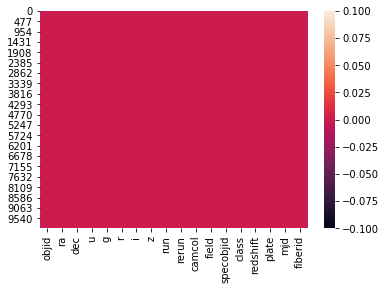

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sp.isnull())
# there are no null values in the data 

In [19]:
items=['objid','ra','dec','u','g','r','i','z','specobjid','redshift']
for i in items:
    sp[i]=sp[i].astype(int)

In [20]:
sp.dtypes
# now all are in integer data types

objid         int32
ra            int32
dec           int32
u             int32
g             int32
r             int32
i             int32
z             int32
run           int64
rerun         int64
camcol        int64
field         int64
specobjid     int32
class        object
redshift      int32
plate         int64
mjd           int64
fiberid       int64
dtype: object

In [21]:
sp.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,-2147483648,183,0,19,17,15,15,15,752,301,4,267,-2147483648,STAR,0,3306,54922,491
1,-2147483648,183,0,18,17,16,16,16,752,301,4,267,-2147483648,STAR,0,323,51615,541
2,-2147483648,183,0,19,18,17,17,16,752,301,4,268,-2147483648,GALAXY,0,287,52023,513
3,-2147483648,183,0,17,16,16,15,15,752,301,4,269,-2147483648,STAR,0,3306,54922,510
4,-2147483648,183,0,17,16,16,16,16,752,301,4,269,-2147483648,STAR,0,3306,54922,512


In [22]:
sp.describe()
# ra,run,field,plate,mjd,fiberid have highest mean and also have outliers
#run has the highest std 

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,-2.147484e+09,175.035100,14.747100,18.149300,16.878200,16.344800,16.091200,15.922300,981.034800,301.0,3.648700,302.380100,-2.147484e+09,0.062600,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.781479,24.951958,0.899828,1.003327,1.101832,1.183225,1.244033,273.305024,0.0,1.666183,162.577763,0.000000e+00,0.288253,1788.778371,1511.150651,206.298149
min,-2.147484e+09,8.000000,-5.000000,12.000000,12.000000,12.000000,11.000000,11.000000,308.000000,301.0,1.000000,11.000000,-2.147484e+09,0.000000,266.000000,51578.000000,1.000000
25%,-2.147484e+09,157.000000,0.000000,18.000000,16.000000,16.000000,15.000000,15.000000,752.000000,301.0,2.000000,184.000000,-2.147484e+09,0.000000,301.000000,51900.000000,186.750000
50%,-2.147484e+09,180.000000,0.000000,18.000000,17.000000,16.000000,16.000000,16.000000,756.000000,301.0,4.000000,299.000000,-2.147484e+09,0.000000,441.000000,51997.000000,351.000000
75%,-2.147484e+09,201.000000,35.000000,19.000000,18.000000,17.000000,17.000000,17.000000,1331.000000,301.0,5.000000,414.000000,-2.147484e+09,0.000000,2559.000000,54468.000000,510.000000
max,-2.147484e+09,260.000000,68.000000,19.000000,19.000000,24.000000,28.000000,22.000000,1412.000000,301.0,6.000000,768.000000,-2.147484e+09,5.000000,8410.000000,57481.000000,1000.000000


In [13]:
# columns that  are unecessary are removed  
i=['rerun','objid','specobjid']
for i in items:
    data[i]=data.drop(i,axis=1)

In [29]:
sp[]=sp.drop(['objid'],axis=1,inplace=True)

In [33]:
data=sp.drop(['rerun','objid','specobjid'],axis=1)

In [34]:
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183,0,19,17,15,15,15,752,4,267,STAR,0,3306,54922,491
1,183,0,18,17,16,16,16,752,4,267,STAR,0,323,51615,541
2,183,0,19,18,17,17,16,752,4,268,GALAXY,0,287,52023,513
3,183,0,17,16,16,15,15,752,4,269,STAR,0,3306,54922,510
4,183,0,17,16,16,16,16,752,4,269,STAR,0,3306,54922,512


Visualising the data

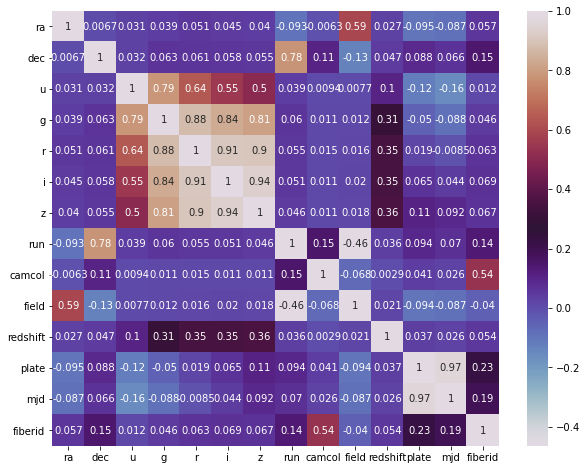

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap="twilight",annot=True)
# from this we can obseve that most of the data isnt co-related with one other 
# mjd and plate are highly co- related from grah

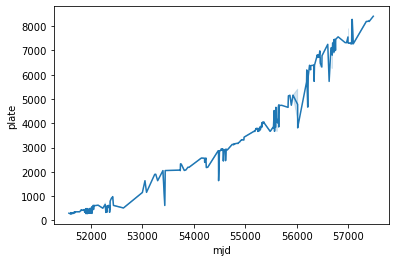

In [36]:
sns.lineplot(x="mjd",y='plate',data=data)
# as the mjd is increasing plate number is also increasing 

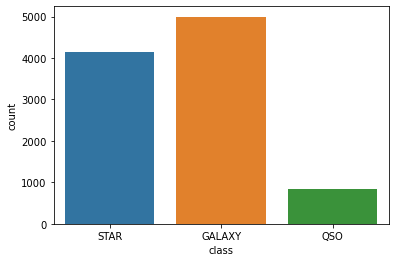

In [37]:
sns.countplot("class",data=data)
# out of all galaxy are the highest one and qso is the least one 

In [38]:
# there arent any columns that arent co related so going with the next task

In [39]:
from sklearn import preprocessing
l=preprocessing.LabelEncoder()
data['class']=l.fit_transform(data['class'])

In [40]:
data.skew()

ra         -1.227973
dec         1.197148
u          -0.989412
g          -0.399910
r          -0.035194
i           0.281655
z           0.194046
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    5.435777
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E23D3D8100>,
      dtype=object)

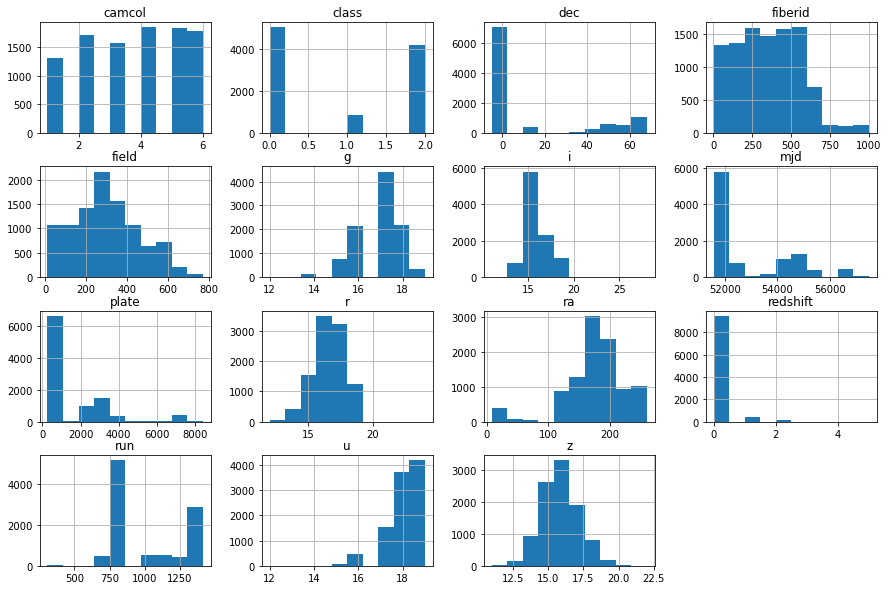

In [41]:

data.hist(figsize=(15,10))

In [45]:
z_score=abs((data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)
# from this it is clear that we shoulnd use zscrore to remove outliers

(10000, 15)
(0, 15)


In [46]:
data.shape

(10000, 15)

In [47]:
data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183,0,19,17,15,15,15,752,4,267,2,0,3306,54922,491
1,183,0,18,17,16,16,16,752,4,267,2,0,323,51615,541
2,183,0,19,18,17,17,16,752,4,268,0,0,287,52023,513
3,183,0,17,16,16,15,15,752,4,269,2,0,3306,54922,510
4,183,0,17,16,16,16,16,752,4,269,2,0,3306,54922,512


In [52]:
# splitting the data 
da_x=data.drop(columns='class',axis=1)
y=data[['class']]

In [53]:
da_x

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,183,0,19,17,15,15,15,752,4,267,0,3306,54922,491
1,183,0,18,17,16,16,16,752,4,267,0,323,51615,541
2,183,0,19,18,17,17,16,752,4,268,0,287,52023,513
3,183,0,17,16,16,15,15,752,4,269,0,3306,54922,510
4,183,0,17,16,16,16,16,752,4,269,0,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131,51,18,17,16,16,16,1345,3,161,0,447,51877,246
9996,131,51,18,17,17,16,16,1345,3,162,0,447,51877,228
9997,131,51,18,17,17,17,17,1345,3,162,0,7303,57013,622
9998,131,51,18,17,17,17,17,1345,3,163,0,447,51877,229


In [54]:
y

,class
0,2
1,2
2,0
3,2
4,2
...,...
9995,0
9996,0
9997,2
9998,0


In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(da_x)
x=pd.DataFrame(x,columns=da_x.columns)

In [56]:
x

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,0.166703,-0.591049,0.945450,0.121402,-1.220573,-0.922271,-0.741416,-0.838061,0.210852,-0.217630,-0.217182,1.031489,1.309311,0.668632
1,0.166703,-0.591049,-0.165929,0.121402,-0.312949,-0.077081,0.062461,-0.838061,0.210852,-0.217630,-0.217182,-0.636213,-0.879197,0.911012
2,0.166703,-0.591049,0.945450,1.118136,0.594676,0.768108,0.062461,-0.838061,0.210852,-0.211479,-0.217182,-0.656339,-0.609191,0.775279
3,0.166703,-0.591049,-1.277308,-0.875332,-0.312949,-0.922271,-0.741416,-0.838061,0.210852,-0.205328,-0.217182,1.031489,1.309311,0.760736
4,0.166703,-0.591049,-1.277308,-0.875332,-0.312949,-0.077081,0.062461,-0.838061,0.210852,-0.205328,-0.217182,1.031489,1.309311,0.770431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.921640,1.452981,-0.165929,0.121402,-0.312949,-0.077081,0.062461,1.331785,-0.389352,-0.869659,-0.217182,-0.566888,-0.705811,-0.519029
9996,-0.921640,1.452981,-0.165929,0.121402,0.594676,-0.077081,0.062461,1.331785,-0.389352,-0.863508,-0.217182,-0.566888,-0.705811,-0.606286
9997,-0.921640,1.452981,-0.165929,0.121402,0.594676,0.768108,0.866339,1.331785,-0.389352,-0.863508,-0.217182,3.266087,2.693094,1.303667
9998,-0.921640,1.452981,-0.165929,0.121402,0.594676,0.768108,0.866339,1.331785,-0.389352,-0.857356,-0.217182,-0.566888,-0.705811,-0.601438


In [57]:
# now the data is ready for training and testing the data 
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.25)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [60]:
knn=KNeighborsClassifier()
sv=SVC()
ada=AdaBoostClassifier()
xg=XGBClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
lg=LogisticRegression()
rf=RandomForestClassifier()

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [62]:
models=[]
models.append(('K neighbors',knn))
models.append(('XG boost ',xg))
models.append(('Ada boost classifier',ada))
models.append(('Decision tree classifier',dtc))
models.append(('Gaussian ',gb))
models.append(('Logistic_ regression',lg))
models.append(('Random_forest classfier',rf))
models.append(('Support vectore machine',sv))

In [63]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print('********',name,'******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    As=accuracy_score(y_test,pre)
    print("Accuracy score =",As)
    score.append(As*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross validation score is =',sc)
    cvs.append(sc*100)
    
    print('\n')
    
    
    print('\n')
    
    
  
    
    
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    
    print('\n\n')

******** K neighbors ******


KNeighborsClassifier()


<ipython-input-63-51f96996257a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train,y_train)




Accuracy score = 0.8816




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

Cross validation score is = 0.8709




[[1185    6   91]
 [  23  154   11]
 [ 150   15  865]]





******** XG boost  ******




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy score = 0.9004




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Cross validation score is = 0.8872




[[1197    7   78]
 [  15  160   13]
 [ 122   14  894]]





******** Ada boost classifier ******




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier()


Accuracy score = 0.8808




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Cross validation score is = 0.8763




[[1195   12   75]
 [  13  160   15]
 [ 162   21  847]]





******** Decision tree classifier ******


DecisionTreeClassifier()


Accuracy score = 0.8692


Cross validation score is = 0.8478




[[1133   16  133]
 [  16  155   17]
 [ 121   24  885]]





******** Gaussian  ******


GaussianNB()


Accuracy score = 0.8452


Cross validation score is = 0.8459




[[1204    0   78]
 [  47  123   18]
 [ 244    0  786]]





******** Logistic_ regression ******




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

LogisticRegression()


Accuracy score = 0.8812




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

Cross validation score is = 0.8788




[[1187    9   86]
 [  13  151   24]
 [ 151   14  865]]





******** Random_forest classfier ******


RandomForestClassifier()


Accuracy score = 0.898




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

Cross validation score is = 0.8926000000000001




[[1188    7   87]
 [  13  158   17]
 [ 116   15  899]]





******** Support vectore machine ******




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()


Accuracy score = 0.8928




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Cross validation score is = 0.8897999999999999




[[1207    5   70]
 [  15  150   23]
 [ 147    8  875]]







In [65]:
# out of all the model xgb classifier is working best with 90% accurate so to increase it we are using grid search parameters 
from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.05],
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], 
              'missing':[-999],
              'seed': [1337]}
i=GridSearchCV(xg,parameters)
i.fit(x,y)
                  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[20:05:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:05:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:05:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,
                                     tree

In [66]:
xg_boost =XGBClassifier(colsample_bytree=0.7,learning_rate= 0.05,max_depth= 6,min_child_weight= 11,missing=-999,n_estimators= 5,nthread= 4,seed= 1337,silent= 1,subsample= 0.8)
xg_boost.fit(x_train,y_train)
print("score",xg_boost.score(x_test,y_test))


[20:05:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


score 0.892


In [71]:
# we are Finalising this model cause it is the best model among all
import joblib

In [73]:
joblib.dump(xg,'Space.obj')

['Space.obj']